# Data 

The Pima Indians dataset is about the prediction of diabetes . This is a small dataset available from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

**Attribute Information:**

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1) (diabetes mellitus)

In [8]:
# Download the data
! wget -O pima-indians-diabetes.csv https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv

--2019-06-04 12:26:22--  https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  23.07K  --.-KB/s    in 0.004s  

2019-06-04 12:26:22 (5.50 MB/s) - ‘pima-indians-diabetes.csv’ saved [23628/23628]



In [9]:
# check if the data is downloaded
%ls -l

total 28
-rw-r--r-- 1 root root 23628 Jun  4 12:26 pima-indians-diabetes.csv
drwxr-xr-x 1 root root  4096 May 31 16:17 sample_data/


In [0]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [15]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [0]:
# split dataset into input (X) and output (Y) variables
# output is the last column
X = dataset[:,0:8]
y = dataset[:,8]

In [22]:
# print the shape of x
print(X.shape)

(768, 8)


In [23]:
# save to number of input dimensions in input_dim
input_dim = 8
input_dim

8

In [24]:
# shape of y
y.shape

(768,)

In [0]:
from keras.utils import to_categorical
y = to_categorical(y, 2)

In [37]:
y.shape

(768, 2)

In [0]:
# Create training and test sets
# Test size should be 15%
# The test and train set should be stratified
# use a random state (for reproducability) of 42
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state = 42)

In [39]:
# shape of X_test
print(X_test.shape)

(116, 8)


# Model

In [0]:
# 1. Create Sequential model
# 2. + 3. Add two hidden dense layers with 12 and 8 nodes. Both should have Relu activations 
# 4. Add a final output layer
# Think about how many nodes the final output layer should have and what activation function is appropiate
# TODO
model = Sequential()
model.add(Dense(12, input_dim=8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [0]:
# Compile the model
# Think about what loss function is appropiate
# Use as the optimizer Adam
# Track as an additional metric Accuracy
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [47]:
# Fit the model
# Use 15% for Validation
# Train for 300 epochs
# User batch size = 10
# Save the model fitting into the variable history
# TODO
history = model.fit(X_train, y_train, batch_size = 10, epochs=300 , validation_split = 0.15)

Instructions for updating:
Use tf.cast instead.
Train on 554 samples, validate on 98 samples
Epoch 1/300
554/554 [==============================] - 3s 6ms/step - loss: 2.3349 - acc: 0.6354 - val_loss: 1.8059 - val_acc: 0.6327
Epoch 2/300
554/554 [==============================] - 0s 351us/step - loss: 1.7054 - acc: 0.6011 - val_loss: 1.1967 - val_acc: 0.5816
Epoch 3/300
554/554 [==============================] - 0s 343us/step - loss: 1.5102 - acc: 0.5975 - val_loss: 0.8711 - val_acc: 0.6429
Epoch 4/300
554/554 [==============================] - 0s 336us/step - loss: 1.2837 - acc: 0.5866 - val_loss: 0.8026 - val_acc: 0.7041
Epoch 5/300
554/554 [==============================] - 0s 340us/step - loss: 1.1653 - acc: 0.5993 - val_loss: 0.7846 - val_acc: 0.6837
Epoch 6/300
554/554 [==============================] - 0s 364us/step - loss: 1.1019 - acc: 0.6137 - val_loss: 0.7456 - val_acc: 0.7041
Epoch 7/300
554/554 [==============================] - 0s 335us/step - loss: 1.0411 - acc: 0.6462 -

In [52]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


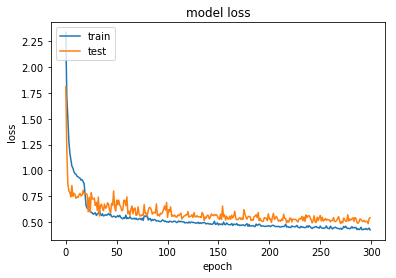

In [58]:
# Plot the History of Training Loss (history.history['loss']) and the Validation Loss (history.history['val_loss'])
# Title should be "Model Loss"
# x label: "Loss"
# y label: "Epoch"
# Legend: "Train" and "Validation"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

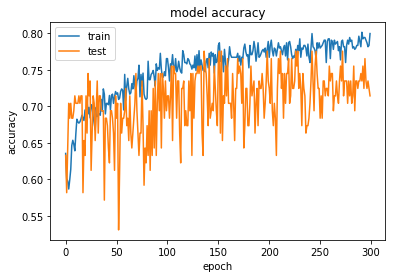

In [59]:
# Plot the History of Training Accuracy (history.history['acc']) and 
# the Validation Accuracy (history.history['val_loss'])
#
# Title should be "Model Accuracy"
# x label: "Accuracy"
# y label: "Epoch"
# Legend: "Train" and "Validation"

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
# Evaluate the loss and accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [70]:
print('Test score:', loss)
print('Test accuracy:', accuracy)

Test score: 0.6079114675521851
Test accuracy: 0.7068965517241379
